In [1]:
from wrangle import get_311_data, clean_311, split_separate_scale
# from explore import get_chi_square, get_first_anova_test, make_dbad_relplot, get_second_anova_test, make_isLate, eval_by_dist, make_avg_days_by_dept
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df_1= get_311_data()
df = clean_311(df_1)

In [3]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df, stratify_by= None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356715 entries, 1014281655 to 1016870499
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356715 non-null  datetime64[ns]
 1   due_date                  356715 non-null  datetime64[ns]
 2   closed_date               356715 non-null  datetime64[ns]
 3   is_late                   356715 non-null  object        
 4   dept                      356715 non-null  object        
 5   call_reason               356715 non-null  object        
 6   case_type                 356715 non-null  object        
 7   case_status               356715 non-null  object        
 8   source_id                 356715 non-null  object        
 9   address                   356715 non-null  object        
 10  council_district          356715 non-null  int64         
 11  longitude                 356715 non-null  float64  

In [5]:
df.council_district.isna().sum()

0

In [6]:
train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
CASEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1016517770,2020-11-15,2020-11-17,2020-11-15,NO,Solid Waste Management,misc,Dead Animal Pick Up,Closed,Web Portal,"410 TAFT BLVD, SAN ANTONIO, 78225",5,2119911.0,13691608.0,0.0,2,2.0,Early Response,0,0,0,0,0,1,0,0,0,0,0,78225
1016203792,2020-05-20,2020-05-29,2020-05-26,NO,Solid Waste Management,waste,Carts(Damaged Cart),Closed,Web Portal,"2907 SPICE MEADOW, SAN ANTONIO, 78222",2,2168516.0,13690548.0,6.0,9,3.0,Early Response,0,0,1,0,0,0,0,0,0,0,0,78222
1016771848,2021-03-29,2021-04-01,2021-03-29,NO,Animal Care Services,field,Cruelty Neglect(Animal Neglect),Closed,Web Portal,"130 A ST, SAN ANTONIO, 78207",5,2117620.0,13693794.0,0.0,3,3.0,Early Response,0,0,0,0,0,1,0,0,0,0,0,78207
1016634860,2021-01-14,2021-01-20,2021-01-16,NO,Solid Waste Management,waste,No Pickup,Closed,Web Portal,"7902 ROBIN REST, SAN ANTONIO, 78209",10,2148086.0,13732708.0,2.0,6,4.0,Early Response,0,0,0,0,0,0,0,0,0,0,1,78209
1016302671,2020-07-20,2020-07-21,2020-07-23,YES,Animal Care Services,field,Animals(Aggressive Critical),Closed,Web Portal,"10735 GOOSE WAY, SAN ANTONIO, 78224",4,2115102.0,13660466.0,3.0,1,-2.0,On Time Response,0,0,0,0,1,0,0,0,0,0,0,78224


## 5. Does category/department affect response time?

In [7]:
make_dbad_relplot(train)

NameError: name 'make_dbad_relplot' is not defined

#### Hypothesis Testing #1 (ANOVA)

$H_0$: There is no difference in mean days open between the departments.

$H_a$: There is a significant difference in days open in animal care services.

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [ ]:
get_first_anova_test(train)

#### Is animal care services slower than the rest of the departments? If not, what is the slowest department?

In [ ]:
make_isLate(train)

In [ ]:
make_avg_days_by_dept(train)

## 6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

In [8]:
    train['council_district'] = train['council_district'].astype('int') 
    dist_3 = train[train["council_district"] == 3]
    dist_8 = train[train["council_district"] == 8]
    dist_9 = train[train["council_district"] == 9]
    dist_3_waste= dist_3[dist_3["call_reason"] == "waste"]
    dist_8_waste= dist_8[dist_8["call_reason"] == "waste"]
    dist_9_waste= dist_9[dist_9["call_reason"] == "waste"]
    dist_3_code= dist_3[dist_3["call_reason"] == "code"]
    dist_8_code= dist_8[dist_8["call_reason"] == "code"]
    dist_9_code= dist_9[dist_9["call_reason"] == "code"]
    dist_3_street= dist_3[dist_3["call_reason"] == "streets"]
    dist_8_street= dist_8[ dist_8["call_reason"] == "streets"]
    dist_9_street= dist_9[ dist_9["call_reason"] == "streets"]
    dist_3_traffic= dist_3[dist_3["call_reason"] == "traffic"]
    dist_8_traffic= dist_8[dist_8["call_reason"] == "traffic"]
    dist_9_traffic= dist_9[dist_9["call_reason"] == "traffic"]

#### Hypothesis Testing #1 (ANOVA)

$H_0$: There is no difference in days before or after due date between the districts.

$H_a$: There is a significant difference in days before or after due date between the districts.

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [ ]:
get_second_anova_test(train)

#### Hypothesis Testing #2 (Chi $^2$)

$H_0$: There is no difference in if a case resolution is late between the districts.

$H_a$: There is a difference if a case resolution is late date between the districts.

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [ ]:
get_chi_square(train)

Now that we know there is a general difference:
- is there is difference in level of delay for waste (most common reason for calls) between district 3 (largest southside district) and district 8/9 (wealthiest sa district)?

In [9]:
train.call_reason.value_counts()

waste               82026
code                53421
field               32223
misc                11564
streets              5614
trades               4953
traffic              3390
customer_service     2298
storm                1941
land                 1011
business              756
license               435
buildings              89
cleanup                39
Name: call_reason, dtype: int64

In [10]:
dist_3.days_open.mean(), dist_8.days_open.mean(), dist_9.days_open.mean()

(22.37065531516051, 14.733932337031264, 13.293686845276723)

In [11]:
train.call_reason.value_counts()

waste               82026
code                53421
field               32223
misc                11564
streets              5614
trades               4953
traffic              3390
customer_service     2298
storm                1941
land                 1011
business              756
license               435
buildings              89
cleanup                39
Name: call_reason, dtype: int64

In [12]:
dist_3_waste.days_open.mean(), dist_8_waste.days_open.mean(), dist_9_waste.days_open.mean(),

(5.046469523234761, 4.924857685009488, 4.40196844243087)

In [13]:
dist_3_waste.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
CASEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1016519840,2020-11-16,2020-11-23,2020-11-18,NO,Solid Waste Management,waste,Carts(Damaged Cart),Closed,Web Portal,"418 SCHOOL ST, SAN ANTONIO, 78210",3,2132457.0,13688809.0,2.0,7,5.0,Early Response,0,0,0,1,0,0,0,0,0,0,0,78210
1015979404,2019-12-16,2019-12-23,2020-06-03,YES,Solid Waste Management,waste,Carts(Cart Exchange),Closed,Web Portal,"455 STONEWALL AVE, SAN ANTONIO, 78214",3,2125585.0,13683887.0,170.0,7,-163.0,Late Response,0,0,0,1,0,0,0,0,0,0,0,78214
1016521955,2020-11-17,2020-11-19,2021-01-20,YES,Solid Waste Management,waste,Carts(Placement),Closed,Web Portal,"221 TERRELL AVE, SAN ANTONIO, 78214",3,2130377.0,13681664.0,64.0,2,-62.0,On Time Response,0,0,0,1,0,0,0,0,0,0,0,78214
1016540400,2020-11-24,2020-12-03,2020-11-27,NO,Solid Waste Management,waste,Carts(Lost-Stolen),Closed,Web Portal,"3134 E SOUTHCROSS BLVD, SAN ANTONIO, 78223",3,2146610.0,13685191.0,3.0,9,6.0,Early Response,0,0,0,1,0,0,0,0,0,0,0,78223
1016294718,2020-07-15,2020-07-22,2020-07-16,NO,Solid Waste Management,waste,Carts(Cart Delivery),Closed,Web Portal,"12918 CHIPPER CROSSING, SAN ANTONIO, 78221",3,2136046.0,13654455.0,1.0,7,6.0,Early Response,0,0,0,1,0,0,0,0,0,0,0,78221


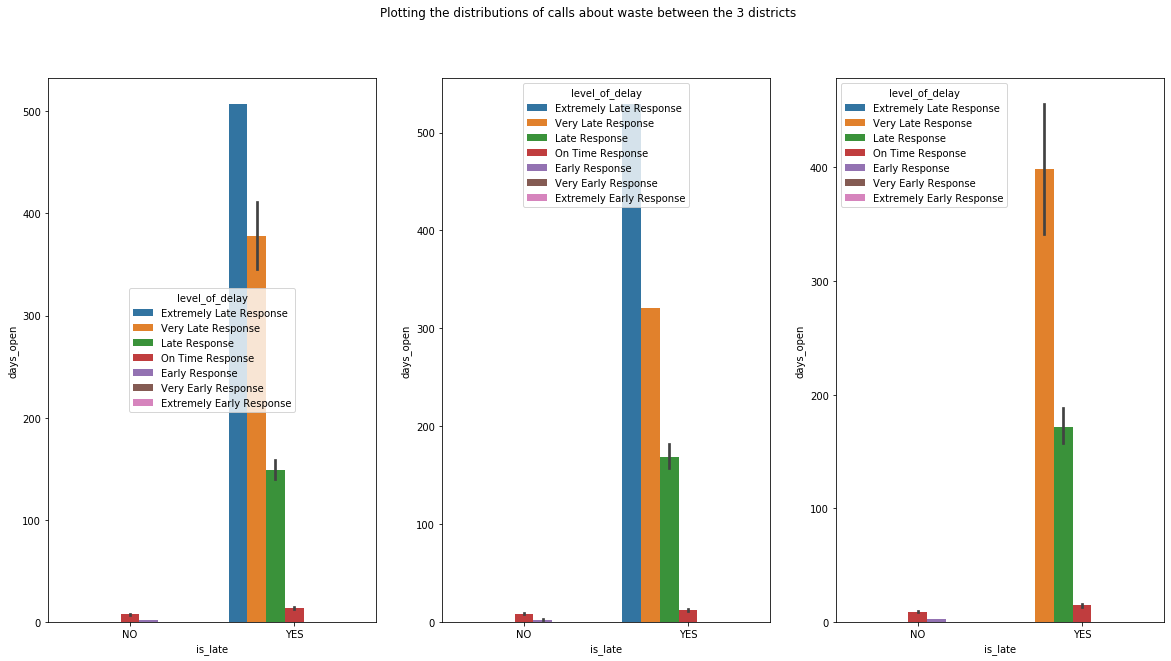

In [14]:
plt.figure(figsize=(20, 10))

plt.suptitle("Plotting the distributions of calls about waste between the 3 districts")

plt.subplot(1,3,1)
sns.barplot(
    data=dist_3_waste,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 3"
plt.subplot(1, 3, 2)
sns.barplot(
    data=dist_8_waste,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 8"

plt.subplot(1, 3, 3)
plt.title="District 9"
sns.barplot(
    data=dist_9_waste,
    x="is_late", y="days_open", hue="level_of_delay"
)


What about for code enforcement in the same 3 areas? (2nd most common reason for call)

In [15]:
dist_3_code.days_open.mean(), dist_8_code.days_open.mean(), dist_9_code.days_open.mean(),

(59.19814787593709, 35.18302976454909, 40.30558858501784)

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle("Plotting the distributions of calls about waste between the 3 districts")

plt.subplot(1,3,1)
sns.barplot(
    data=dist_3_code,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 3"
plt.subplot(1, 3, 2)
sns.barplot(
    data=dist_8_code,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 8"

plt.subplot(1, 3, 3)
plt.title="District 9"
sns.barplot(
    data=dist_9_code,
    x="is_late", y="days_open", hue="level_of_delay"
)

Lastly I am going to explore if traffic/street calls response times vary between the 3 districts.

In [ ]:
dist_3_street.days_open.mean(), dist_8_street.days_open.mean(), dist_9_street.days_open.mean()

In [ ]:
dist_3_traffic.days_open.mean(), dist_8_traffic.days_open.mean(),dist_9_traffic.days_open.mean()

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle("Plotting the distributions of calls about streets between the 3 districts")

plt.subplot(1,3,1)
sns.barplot(
    data=dist_3_street,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 3"
plt.subplot(1, 3, 2)
sns.barplot(
    data=dist_8_street,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 8"

plt.subplot(1, 3, 3)
plt.title="District 9"
sns.barplot(
    data=dist_9_street,
    x="is_late", y="days_open", hue="level_of_delay"
)

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle("Plotting the distributions of calls about traffic between the 3 districts")

plt.subplot(1,3,1)
sns.barplot(
    data=dist_3_traffic,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 3"
plt.subplot(1, 3, 2)
sns.barplot(
    data=dist_8_traffic,
    x="is_late", y="days_open", hue="level_of_delay"
)
plt.title="District 8"

plt.subplot(1, 3, 3)
plt.title="District 9"
sns.barplot(
    data=dist_9_traffic,
    x="is_late", y="days_open", hue="level_of_delay"
)